import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import database

In [2]:
df = pd.read_csv("dataset_hargaleptop.csv")
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Price
0,Asus,3.830296,16,512,17395.09
1,Acer,2.912833,4,1000,31607.61
2,Lenovo,3.241627,4,256,9291.02
3,Acer,3.806248,16,512,17436.73
4,Acer,3.268097,32,1000,32917.99
...,...,...,...,...,...
995,HP,3.343584,4,1000,31593.67
996,Dell,2.780555,8,256,9149.52
997,Dell,3.200569,4,512,16552.40
998,Asus,1.604182,8,256,9407.47


1. data understanding

In [3]:
df['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4    Price            1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [5]:
df.shape

(1000, 5)

2. cleaning data

In [6]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
 Price              0
dtype: int64

In [7]:
df.duplicated().sum()

0

3. exploratory data analysis (EDA)

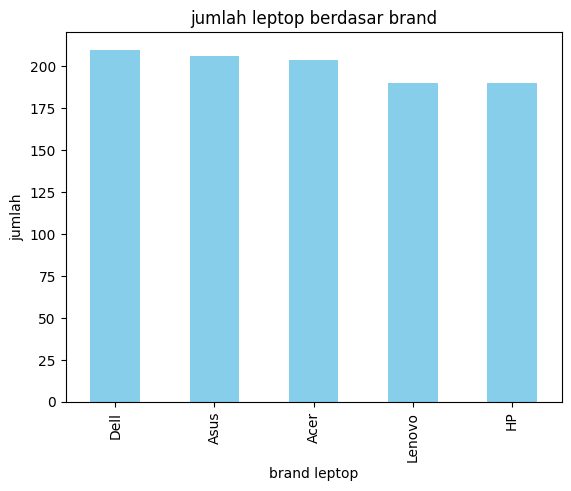

In [8]:
jumlah_leptop = df['Brand'].value_counts()

plt.Figure(figsize=(10, 6))
jumlah_leptop.plot(kind='bar', color='skyblue')
plt.xlabel('brand leptop')
plt.ylabel('jumlah')
plt.title('jumlah leptop berdasar brand')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5932\3891143499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' Price '])


<Axes: xlabel=' Price ', ylabel='Density'>

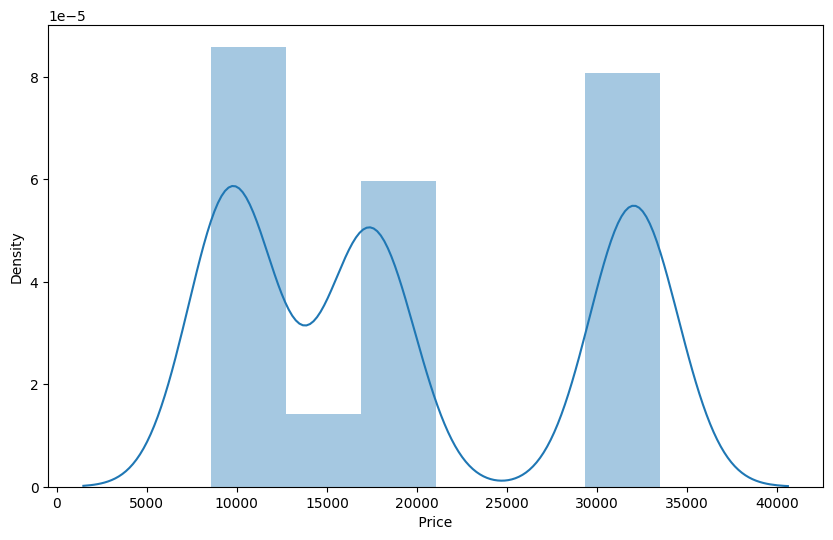

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df[' Price '])

4. label encoder

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4    Price            1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

b_encoder = LabelEncoder()
df['Brand'] = b_encoder.fit_transform(df['Brand'])

In [12]:
df.head(30)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Price
0,1,3.830296,16,512,17395.09
1,0,2.912833,4,1000,31607.61
2,4,3.241627,4,256,9291.02
3,0,3.806248,16,512,17436.73
4,0,3.268097,32,1000,32917.99
5,3,1.881348,16,256,9543.72
6,4,2.940721,32,256,10390.14
7,4,3.016788,4,256,9214.48
8,4,2.560327,4,512,16372.18
9,0,3.341111,32,512,18501.83


5. preparation data

In [13]:
features = ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity']
x = df[features]
y = df[' Price ']
x.shape, y.shape

((1000, 4), (1000,))

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
y_test.shape

(500,)

6. training & evaluation data

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [16]:
score = lr.score(x_test, y_test)
print("Akurasi prediksi adalah ", score)

Akurasi prediksi adalah  0.9995075788647824


7. TESTING

In [17]:
input_data = {
    'Brand' : 'Lenovo',
    'Processor_Speed' : 2.34567,
    'RAM_Size' : 32,
    'Storage_Capacity' : 512
}
input_df = pd.DataFrame([input_data])

input_df['Brand'] = b_encoder.transform(input_df['Brand'])
input_df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity
0,4,2.34567,32,512


In [18]:
prediction =lr.predict(input_df)
prediction_formatted = round(prediction[0], 2)

print("estimasi harga leptop : ", prediction_formatted)

estimasi harga leptop :  18164.26
